<img src="https://gitlab.com/bivl2ab/academico/macv/semillero-uis-2020-2/-/raw/master/img/Banner_Logo.jpeg" alt="Drawing" style="width:700px;">

# <center> 06. Deep models </center>

**connect google colab and google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import pandas as pd
import numpy as np
import imageio
import tensorflow as tf
import matplotlib.pyplot as plt

**Train data**

In [110]:
train1pd = pd.read_csv("/content/drive/My Drive/Colab Notebooks/semillero/dataset/tma_info/ZT76_pgleason_scores.csv",sep='\t', index_col=0)
train1pd = train1pd.reset_index()
print(train1pd.head())

                                          patch_name  grade_
0  /content/drive/My Drive/Colab Notebooks/semill...       1
1  /content/drive/My Drive/Colab Notebooks/semill...       1
2  /content/drive/My Drive/Colab Notebooks/semill...       1
3  /content/drive/My Drive/Colab Notebooks/semill...       1
4  /content/drive/My Drive/Colab Notebooks/semill...       1


**Random transformations**

when we have little data, random transformations are usually applied to generate new data.

In [98]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    zoom_range=[0.9, 1.25],
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='reflect'
)

In [35]:
path = train1pd.iloc[0]["patch_name"]
img = imageio.imread(path)
img = img.reshape((1,) + img.shape)
imgtransform = datagen.flow(img, batch_size=1).next()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f08f33e75c0>,
 Text(0.5, 1.0, 'Transform'))

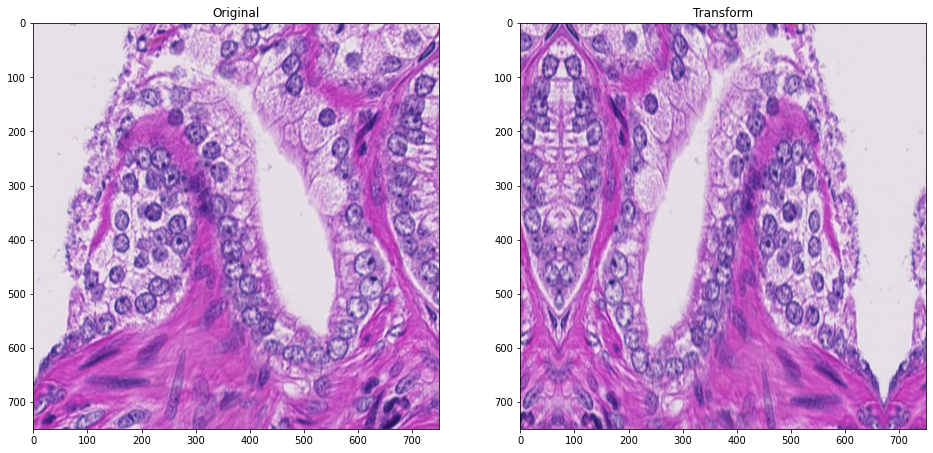

In [36]:
plt.figure(figsize=(16,16))
plt.subplot(121),plt.imshow(img.reshape((750,750,3))),plt.title("Original")
plt.subplot(122),plt.imshow(imgtransform.astype(np.uint8).reshape((750,750,3))),plt.title("Transform")

**Batches de datos**

data batches are used to train the model, for this keras offers us data generators that load a batch at a time without overloading the Ram memory

In [113]:
train1pd = train1pd.astype({"grade_": 'string'})
train1pd = train1pd.iloc[0:160]
print(train1pd.head())

                                          patch_name grade_
0  /content/drive/My Drive/Colab Notebooks/semill...      1
1  /content/drive/My Drive/Colab Notebooks/semill...      1
2  /content/drive/My Drive/Colab Notebooks/semill...      1
3  /content/drive/My Drive/Colab Notebooks/semill...      1
4  /content/drive/My Drive/Colab Notebooks/semill...      1


In [114]:
train_generator = datagen.flow_from_dataframe(
    train1pd,
    directory=None,
    x_col="patch_name",
    y_col="grade_",
    batch_size=32,
    shuffle=True,
    target_size=(224,224)
)

Found 160 validated image filenames belonging to 3 classes.


In [93]:
batch = train_generator.next()
len(batch)

2

In [69]:
np.array(batch[1]).shape

(32, 4)

**Create deep model**

In [115]:
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')
x_top = base_model.output
# number of classes 
x_out = tf.keras.layers.Dense(3, name='output', activation='softmax')(x_top)
model = tf.keras.models.Model(base_model.input, x_out)

In [116]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [117]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics = ['accuracy'])

**Train model**

In [119]:
history = model.fit(
                train_generator,
                epochs=10
      )

Epoch 1/10
5/5 [==============================] - 3s 682ms/step - loss: 1.3095 - accuracy: 0.3000
Epoch 2/10
5/5 [==============================] - 3s 690ms/step - loss: 1.1509 - accuracy: 0.3063
Epoch 3/10
5/5 [==============================] - 3s 678ms/step - loss: 1.1064 - accuracy: 0.3562
Epoch 4/10
5/5 [==============================] - 3s 670ms/step - loss: 1.1487 - accuracy: 0.3438
Epoch 5/10
5/5 [==============================] - 3s 674ms/step - loss: 1.1335 - accuracy: 0.3187
Epoch 6/10
5/5 [==============================] - 3s 672ms/step - loss: 1.0979 - accuracy: 0.3688
Epoch 7/10
5/5 [==============================] - 3s 675ms/step - loss: 1.0978 - accuracy: 0.3688
Epoch 8/10
5/5 [==============================] - 3s 673ms/step - loss: 1.1065 - accuracy: 0.3625
Epoch 9/10
5/5 [==============================] - 3s 670ms/step - loss: 1.0975 - accuracy: 0.3688
Epoch 10/10
5/5 [==============================] - 3s 678ms/step - loss: 1.0973 - accuracy: 0.3688


In [122]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


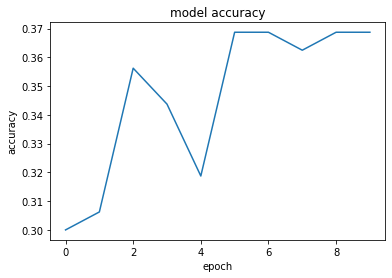

In [123]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

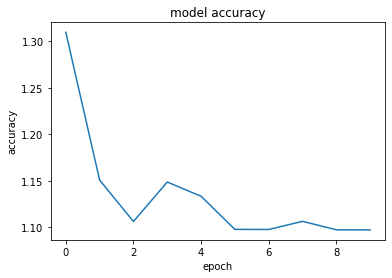

In [124]:
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Referencias

[1] Keras models: https://keras.io/api/applications/

[2] Keras data generators: https://keras.io/api/preprocessing/image/

[3] Keras tutorial: https://elitedatascience.com/keras-tutorial-deep-learning-in-python